Árvore de Decisão

In [119]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Usaremos dois arquivos para treino e teste:

-iris-treino.csv: contém a amostra de treinamento. São os exemplos que, em uma aplicação real, nós teríamos coletado para encontrar os parâmetros do modelo.

-iris-teste.csv: contém um conjunto de dados que simula os exemplos futuros, isto é, aqueles que serão usados com o nosso modelo em produção.

Ambos os arquivos contêm dados que foram sub-amostrados da base Iris. Você pode obter a base Iris completa se executar os seguintes comandos, caso não queira utilizar as bases localmente:

from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [120]:
# carregando a base local:
iris_treino = pd.read_csv("baseDados/iris-treino.csv")
iris_teste = pd.read_csv("baseDados/iris-teste.csv")

In [121]:
# visualizando os dados
iris_treino.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.2,3.4,5.4,2.3,virginica
1,5.1,3.3,1.7,0.5,setosa
2,6.7,2.5,5.8,1.8,virginica
3,5.6,2.5,3.9,1.1,versicolor
4,4.4,3.2,1.3,0.2,setosa


In [122]:
# visualizando os dados
iris_teste.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.7,3.8,6.7,2.2,virginica
1,6.3,3.3,6.0,2.5,virginica
2,7.2,3.2,6.0,1.8,virginica
3,7.0,3.2,4.7,1.4,versicolor
4,6.8,2.8,4.8,1.4,versicolor


Verifique alguns exemplos do conjunto de treinamento utilizando o método head.

In [123]:
matriz = iris_treino.iloc[:, :-1].to_numpy()
matriz

array([[6.2, 3.4, 5.4, 2.3],
       [5.1, 3.3, 1.7, 0.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [4.4, 3.2, 1.3, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.2, 2.7, 3.9, 1.4],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.8, 1.5, 0.3],
       [5. , 3. , 1.6, 0.2],
       [6. , 3.4, 4.5, 1.6],
       [6. , 2.9, 4.5, 1.5],
       [5.8, 4. , 1.2, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 2.8, 4.7, 1.2],
       [4.8, 3.4, 1.6, 0.2],
       [6.5, 3. , 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [5.6, 2.8, 4.9, 2. ],
       [4.6, 3.1, 1.5, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [6.5, 3. , 5.8, 2.2],
       [6.9, 3.1, 4.9, 1.5],
       [5.9, 3. , 4.2, 1.5],
       [4.8, 3. , 1.4, 0.1],
       [5.6, 2.9, 3.6, 1.3],
       [4.6, 3.6, 1. , 0.2],
       [6.5, 3.2, 5.1, 2. ],
       [5. , 3.4, 1.6, 0.4],
       [5.5, 3.5, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [5.5, 2.6, 4.4, 1.2],
       [5.5, 4.2, 1.4, 0.2],
       [5.4, 3

Para verificar o formato da tabela de treinamento usaremos o atributo shape.

In [124]:
iris_treino.shape

(64, 5)

In [125]:
iris_teste.shape

(86, 5)

O conjunto de treino deve ter 64 linhas e 5 colunas, enquanto o conjunto de teste deve ter 86 linhas e 5 colunas.

In [126]:
print("O conjunto de treino: ", " Está Ok " if iris_treino.shape == (64, 5) else "Contém erros ")
print("O conjunto de teste: ", " Está Ok " if iris_teste.shape == (86, 5) else "Contém erros ")

O conjunto de treino:   Está Ok 
O conjunto de teste:   Está Ok 


Para verificar o índice das colunas de um dos dois conjuntos, utilizamos 'columns'

In [127]:
iris_treino.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [128]:
iris_treino.columns.values

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'], dtype=object)

In [129]:
iris_treino.index

RangeIndex(start=0, stop=64, step=1)

Essas colunas são os atributos da base. Eles descrevem espécimes de três sub-espécies da flor Iris:
Iris versicolor, Iris setosa e Iris virginica.

Os atributos são os seguintes:

- sepal_length e sepal_width: comprimento e largura da sépala, respectivamente
- petal_length e petal_width: comprimento e largura da pétala, respectivamente

Agora usaremos o método pd.Series.unique(), aplicado na coluna 'species', para obter os valores das três classes.

In [130]:
iris_treino.iloc[:, : -1]

,sepal_length,sepal_width,petal_length,petal_width
0,6.2,3.4,5.4,2.3
1,5.1,3.3,1.7,0.5
2,6.7,2.5,5.8,1.8
3,5.6,2.5,3.9,1.1
4,4.4,3.2,1.3,0.2
...,...,...,...,...
59,4.7,3.2,1.3,0.2
60,6.6,2.9,4.6,1.3
61,6.4,3.2,4.5,1.5
62,6.4,2.9,4.3,1.3


In [131]:
iris_treino.iloc[:,-1]

0      virginica
1         setosa
2      virginica
3     versicolor
4         setosa
         ...    
59        setosa
60    versicolor
61    versicolor
62    versicolor
63    versicolor
Name: species, Length: 64, dtype: object

In [132]:
# importando o modelo
from sklearn.tree import DecisionTreeClassifier

In [133]:
h = DecisionTreeClassifier()

In [134]:
# fazendo o fit com o classificador na base iris para treino (ajustando os dados)
h.fit(iris_treino.iloc[:,:-1], iris_treino.iloc[:,-1])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


 Utilizando o método pd.Series.unique() para obter as classes da base (3)

In [135]:
x = iris_treino.iloc[:,-1].unique()
x.sort()
x

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Uma característica do scikit-learn é que as suas classes exigem valores numéricos.
É necessário converter as strings utilizando um esquema de codificação
Essa codificação pode ser feita com a classe 'LabelEncoder', do módulo sklearn.preprocessing.

Vamos obter as 'características' de treino e de teste

In [136]:
X_train = iris_treino.iloc[:, :-1].values
X_test = iris_treino.iloc[:,:-1].values

Vamos 'treinar' um codificador de rótulos nas classes do conjunto de treinamento

In [137]:
# importando o labelEnconder do módulo preprocessing
from sklearn.preprocessing import LabelEncoder

In [138]:
label = LabelEncoder().fit(iris_treino['species'])

Em seguida vamos obter as 'classes' de 'treino' e de 'teste' já codificadas.

In [139]:
y_train = label.transform(iris_treino['species'])
y_test = label.transform(iris_teste['species'])

Treinamento do modelo

Agora que a base de dados está carregada e as duas partições de dados estão criadas, nós utilizaremos o método de árvore de decisão para classificação.

In [140]:
# importando o classificador do modelo
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Para treinar e aplicar modelos, o scikit-learn adota um protocolo de duas partes:
- fit: realiza o ajuste do modelo aos dados, encontrando os 'parâmetros da melhor hipótese à amostra de treinamento'
- predict: aplica o modelo a um conjunto de dados, realizando a 'previsão da classe'

Para o ajuste, o modelo precisa de acesso às características e às classes. Para previsões, o modelo precisa apenas das características dos 
exemplos a serem previstos, e retorna os valores previstos.

Vamos instanciar um objeto da classe 'DecisionTreeClassifier'

Se nenhum argumento for passado para o construtor, será utilizado o critério de impureza de Gini para encontrar os atributos. 
Para usar ganho de informação e entropia, podemos especificar criterion='entropy'.

In [141]:
clf = DecisionTreeClassifier()

Em seguida, usando o método fit, faremos o treinamento do modelo para a amostra de treino.

In [142]:
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Podemos visualizar a nossa árvore com o uso do método DecisionTreeClassifier.plot_tree() para desenhar uma figura que representa as 
decisões que foram aprendidas pelo modelo de árvore.
O método plt.figure() é usado primeiramente para especificarmos as dimensões da figura que será plotada.

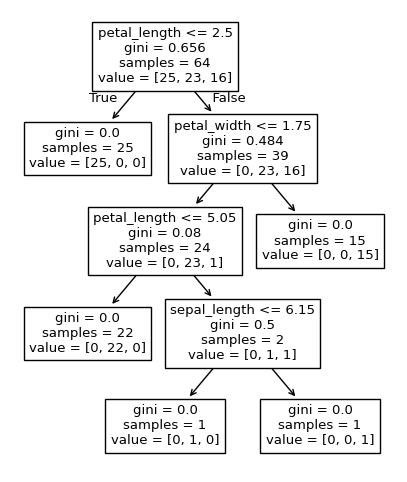

In [143]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train);
plt.figure(figsize=(5, 6));
tree.plot_tree(clf, feature_names=iris_treino.columns[:-1]);

Teste do modelo

Agora vamos verificar como esse modelo se comporta quando é aplicado aos exemplos do conjunto de teste.
Faremos a previsão com o modelo nos dados de teste.

In [144]:
ypred = clf.predict(X_test)

In [145]:
ypred

array([2, 0, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0,
       2, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2, 0,
       0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1])

Os resultados são todos numéricos... mas podemos usar o LabelEncoder para verificar quais flores são essas.

In [146]:
label.inverse_transform(ypred)

array(['virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'versicolor'], dtype=object)

Podemos fazer um DataFrame comparando quais casos foram corretamente classificados e quais foram incorretamente classificados.

In [147]:
tabela = pd.DataFrame(columns=['Classe Verdadeira', 'Classe Predita'])
tabela.iloc[:,0] = iris_teste['species']
tabela.iloc[:,1] = label.inverse_transform(ypred)
tabela

ValueError: Must have equal len keys and value when setting with an iterable